In [1]:
import os

# Подивимось на структуру папок датасету
data_path = "/kaggle/input"

for dirname, _, filenames in os.walk(data_path):
    # Показуємо тільки назви папок (класи), не всі файли
    level = dirname.replace(data_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(dirname)}/')
    if level >= 2:  # не заглиблюємось далі 2 рівнів
        continue

input/
  datasets/
    sshikamaru/
      fruit-recognition/
        test/
          test/
        train/
          train/
            Orange/
            Tomato/
            Passion Fruit/
            Cucumber Ripe/
            Cactus fruit/
            Pomegranate/
            Plum/
            Pineapple/
            Papaya/
            Potato Red/
            Kiwi/
            Limes/
            Apple Braeburn/
            Pear/
            Onion White/
            Strawberry/
            Grape Blue/
            Blueberry/
            Apple Granny Smith/
            Apricot/
            Pepper Red/
            Clementine/
            Lemon/
            Avocado/
            Raspberry/
            Cantaloupe/
            Peach/
            Corn/
            Banana/
            Cherry/
            Pepper Green/
            Watermelon/
            Mango/


In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Пристрій: {device}")

Пристрій: cuda


In [3]:
# Трансформації для тренувальних даних (з аугментацією)
# Посилання: https://pytorch.org/vision/stable/transforms.html
# Навіщо це потрібно: нейромережа вчиться краще, коли бачить більше різноманітних прикладів.
# Без аугментації вона може "завчити" конкретні фото замість того,
# щоб зрозуміти загальні ознаки фрукта.
# Аугментація — це коли ти штучно "розмножуєш" свої фотографії, трохи змінюючи кожну.
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),           # Змінюємо розмір до 224x224
    transforms.RandomHorizontalFlip(p=0.5),  # Випадковий горизонтальний переворот
    transforms.RandomRotation(10),           # Випадковий поворот до 10 градусів
    transforms.ToTensor(),                   # Конвертуємо в тензор [0, 1]
])

# Трансформації для тестових даних (без аугментації)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),           # Тільки змінюємо розмір
    transforms.ToTensor(),                   # Конвертуємо в тензор
])

In [19]:
# Шлях до даних 
# Cтруктура у Блоку 1
train_path = "/kaggle/input/datasets/sshikamaru/fruit-recognition/train/train/"
test_path = "/kaggle/input/datasets/sshikamaru/fruit-recognition/test/test/"

# Створюємо датасети з відповідними трансформаціями
train_dataset = datasets.ImageFolder(train_path, transform=train_transform)
test_dataset = datasets.ImageFolder(test_path, transform=test_transform)



FileNotFoundError: Couldn't find any class folder in /kaggle/input/datasets/sshikamaru/fruit-recognition/test/test/.

In [5]:
print(f"Кількість тренувальних зразків: {len(train_dataset)}")
print(f"Кількість тестових зразків: {len(test_dataset)}")

Кількість тренувальних зразків: 16854
Кількість тестових зразків: 5641


In [6]:
# Назви класів (фруктів)
print(f"Кількість класів: {len(train_dataset.classes)}")
print(f"Класи: {train_dataset.classes}")
print(f"\nclass_to_idx: {train_dataset.class_to_idx}")

Кількість класів: 33
Класи: ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']

class_to_idx: {'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper Green': 23, 'Pepper Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}


In [7]:
# Подивимось на перший зразок
img, label = train_dataset[0]
print(f"Тип: {type(img)}")
print(f"Форма тензора: {img.shape}")  # [C, H, W] = [3, 224, 224]
print(f"Мітка (індекс): {label}")
print(f"Назва класу: {train_dataset.classes[label]}")

# Перший зразок з кожного класу (до 5 класів)
shown_classes = set()
for i in range(len(train_dataset)):
    img, label = train_dataset[i]
    if label not in shown_classes:
        print(f"Зразок [{i}]: форма {img.shape}, мітка: {label} → {train_dataset.classes[label]}")
        shown_classes.add(label)
    if len(shown_classes) >= 5:
        break

Тип: <class 'torch.Tensor'>
Форма тензора: torch.Size([3, 224, 224])
Мітка (індекс): 0
Назва класу: Apple Braeburn
Зразок [0]: форма torch.Size([3, 224, 224]), мітка: 0 → Apple Braeburn
Зразок [492]: форма torch.Size([3, 224, 224]), мітка: 1 → Apple Granny Smith
Зразок [984]: форма torch.Size([3, 224, 224]), мітка: 2 → Apricot
Зразок [1476]: форма torch.Size([3, 224, 224]), мітка: 3 → Avocado
Зразок [1903]: форма torch.Size([3, 224, 224]), мітка: 4 → Banana


In [8]:
# Розмір батчу
batch_size = 32

# Створюємо DataLoader для тренувальних та тестових даних
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Перевірка
for images, labels in train_loader:
    print(f"Форма батчу зображень: {images.shape}")  # [batch_size, 3, 224, 224]
    print(f"Форма батчу міток: {labels.shape}")       # [batch_size]
    break  # Виводимо тільки перший батч

Форма батчу зображень: torch.Size([32, 3, 224, 224])
Форма батчу міток: torch.Size([32])


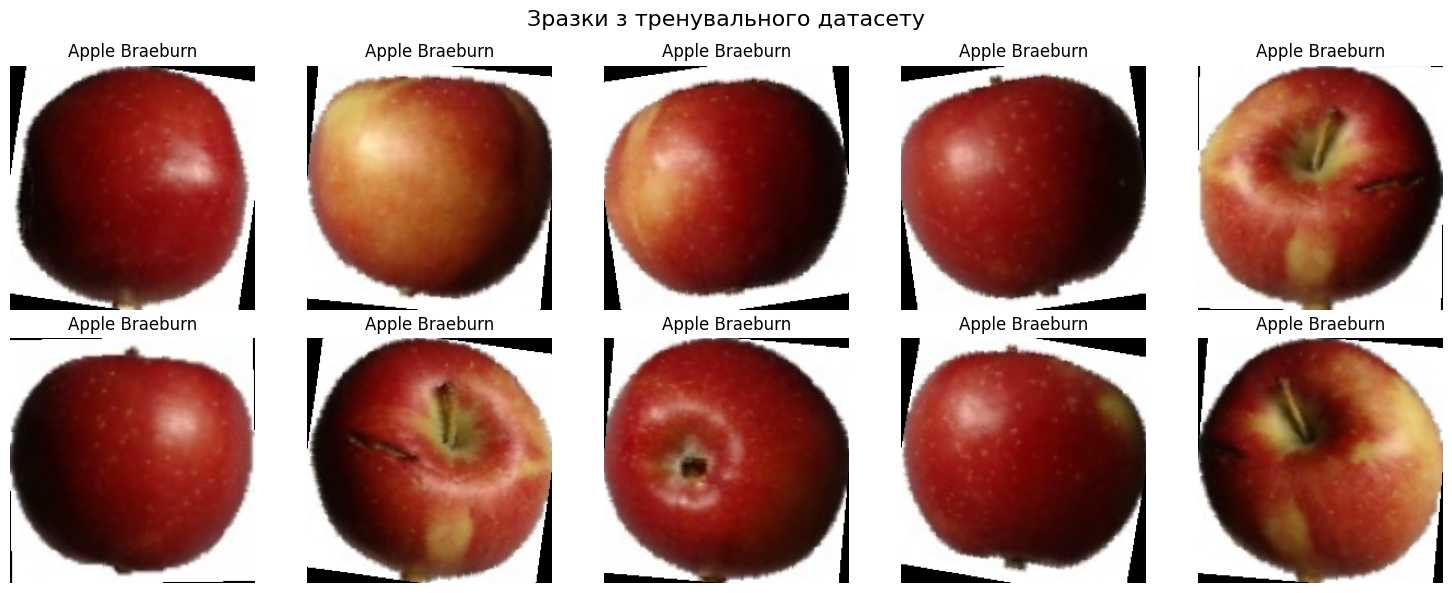

In [9]:
# Візуалізація кількох зразків з тренувального набору
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    img, label = train_dataset[i]
    # Конвертуємо тензор [C, H, W] → [H, W, C] для matplotlib
    img_np = img.permute(1, 2, 0).numpy()
    ax.imshow(img_np)
    ax.set_title(train_dataset.classes[label])
    ax.axis('off')

plt.suptitle("Зразки з тренувального датасету", fontsize=16)
plt.tight_layout()
plt.show()

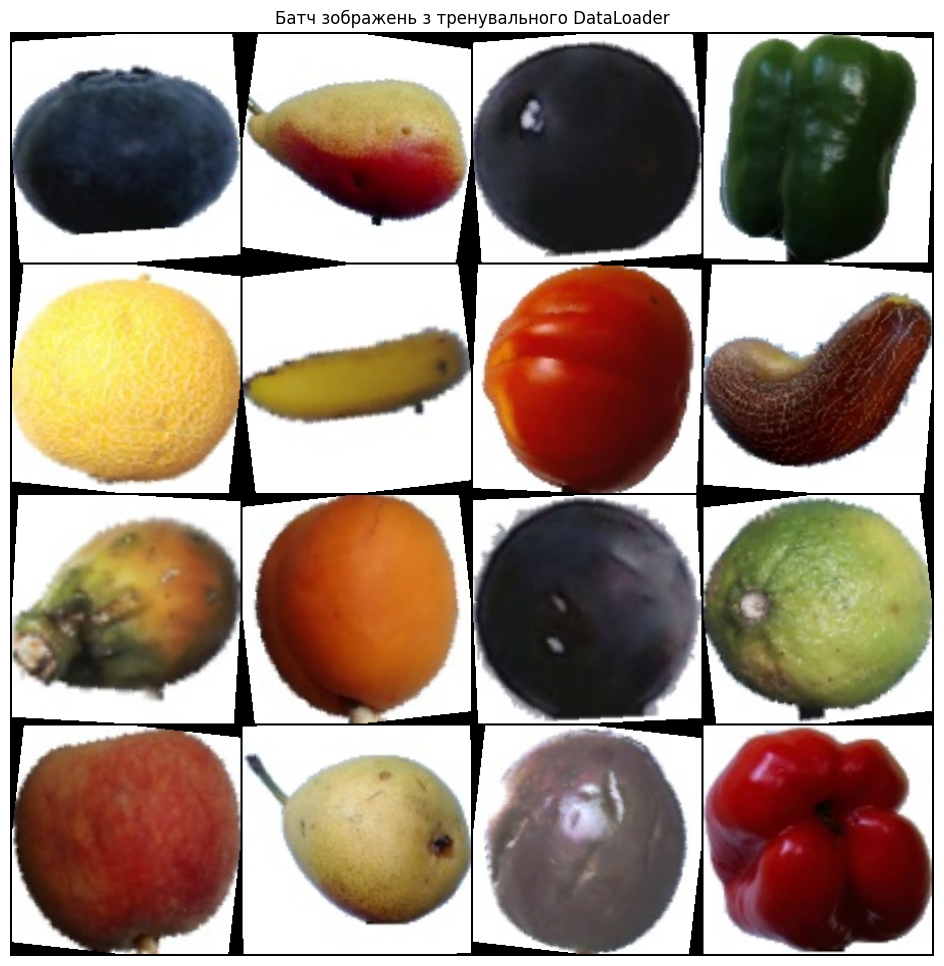

Мітки: ['Blueberry', 'Pear', 'Grape Blue', 'Pepper Green', 'Cantaloupe', 'Banana', 'Tomato', 'Cucumber Ripe', 'Cactus fruit', 'Apricot', 'Grape Blue', 'Limes', 'Peach', 'Pear', 'Passion Fruit', 'Pepper Red']


In [10]:
# Отримуємо один батч
images, labels = next(iter(train_loader))

# Створюємо сітку зображень
grid = make_grid(images[:16], nrow=4, padding=2)

# Відображаємо
plt.figure(figsize=(12, 12))
plt.imshow(grid.permute(1, 2, 0).numpy())
plt.title("Батч зображень з тренувального DataLoader")
plt.axis('off')
plt.show()

# Виводимо мітки
print("Мітки:", [train_dataset.classes[l] for l in labels[:16].tolist()])

In [11]:
# Fruit Classification — 4 варіанти нейромережі

# Вхід:       3 × 224 × 224 = 150528
# Flatten:    [batch, 150528]
# Linear/Dense 1:  150528 → 512  + activation
# Linear/Dense 2:  512 → 256     + activation
# Linear/Dense 3:  256 → 128     + activation
# Linear/Dense 4:  128 → num_classes (вихід)

# Блок P1 — Імпорт та дані (PyTorch)

# Параметри
input_size = 3 * 224 * 224  # 150528
num_classes = len(train_dataset.classes)

print(f"Тренувальних: {len(train_dataset)}")
print(f"Тестових: {len(test_dataset)}")
print(f"Класів: {num_classes} → {train_dataset.classes}")
print(f"Розмір входу: {input_size}")


Тренувальних: 16854
Тестових: 5641
Класів: 33 → ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
Розмір входу: 150528


In [12]:
 # Варіант 1: PyTorch + ReLU

class FruitNet_ReLU(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),                         # Шар 1: → [batch, 150528]
            nn.Linear(input_size, 512),            # Шар 2: 150528 → 512
            nn.ReLU(),
            nn.Linear(512, 256),                   # Шар 3: 512 → 256
            nn.ReLU(),
            nn.Linear(256, 128),                   # Шар 4: 256 → 128
            nn.ReLU(),
            nn.Linear(128, num_classes),            # Шар 5: 128 → num_classes
        )

    def forward(self, x):
        return self.model(x)

model_relu = FruitNet_ReLU(input_size, num_classes).to(device)
print("=== PyTorch + ReLU ===")
print(model_relu)

=== PyTorch + ReLU ===
FruitNet_ReLU(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=150528, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=128, bias=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=33, bias=True)
  )
)


In [13]:
 # Варіант 2: PyTorch + LeakyReLU

class FruitNet_LeakyReLU(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),                         # Шар 1: → [batch, 150528]
            nn.Linear(input_size, 512),            # Шар 2: 150528 → 512
            nn.LeakyReLU(negative_slope=0.01),
            nn.Linear(512, 256),                   # Шар 3: 512 → 256
            nn.LeakyReLU(negative_slope=0.01),
            nn.Linear(256, 128),                   # Шар 4: 256 → 128
            nn.LeakyReLU(negative_slope=0.01),
            nn.Linear(128, num_classes),            # Шар 5: 128 → num_classes
        )

    def forward(self, x):
        return self.model(x)

model_leaky = FruitNet_LeakyReLU(input_size, num_classes).to(device)

print("=== PyTorch + LeakyReLU ===")
print(model_leaky)

=== PyTorch + LeakyReLU ===
FruitNet_LeakyReLU(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=150528, out_features=512, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Linear(in_features=256, out_features=128, bias=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Linear(in_features=128, out_features=33, bias=True)
  )
)


In [14]:
# Перевірка обох моделей PyTorch

# тут потрібен .to(device)
images, labels = next(iter(train_loader))
images = images.to(device)          # ← бо модель на GPU

output_relu = model_relu(images)     # модель на GPU, дані теж на GPU
output_leaky = model_leaky(images)

print(f"Вхід:             {images.shape}")
print(f"Вихід ReLU:       {output_relu.shape}")
print(f"Вихід LeakyReLU:  {output_leaky.shape}")

# Кількість параметрів
def count_params(model):
    return sum(p.numel() for p in model.parameters())

print(f"\nПараметрів ReLU:      {count_params(model_relu):,}")
print(f"Параметрів LeakyReLU: {count_params(model_leaky):,}")

Вхід:             torch.Size([32, 3, 224, 224])
Вихід ReLU:       torch.Size([32, 33])
Вихід LeakyReLU:  torch.Size([32, 33])

Параметрів ReLU:      77,239,329
Параметрів LeakyReLU: 77,239,329


In [15]:

# TensorFlow / Keras
# Імпорт та дані (TensorFlow)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

train_tf = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
)
test_tf = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
)

# Зберігаємо class_names ДО map
class_names_tf = train_tf.class_names
num_classes_tf = len(class_names_tf)

# Нормалізація
normalization = layers.Rescaling(1./255)
train_tf = train_tf.map(lambda x, y: (normalization(x), y))
test_tf = test_tf.map(lambda x, y: (normalization(x), y))

# Параметри
input_shape = (224, 224, 3)
print(f"Класи: {class_names_tf}")
print(f"Кількість класів: {num_classes_tf}")

2026-02-20 16:00:05.286151: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771603205.305975     118 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771603205.312415     118 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771603205.329963     118 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771603205.329989     118 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771603205.329991     118 computation_placer.cc:177] computation placer alr

Found 16854 files belonging to 33 classes.


I0000 00:00:1771603213.934931     118 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14839 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 5641 files belonging to 1 classes.
Класи: ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
Кількість класів: 33


In [16]:
# Варіант 3: TensorFlow + ReLU
# model_tf_relu = keras.Sequential([
#     layers.Flatten(input_shape=input_shape, name='flatten'),      # Шар 1
#     layers.Dense(512, activation='relu', name='dense_1'),          # Шар 2: 150528 → 512
#     layers.Dense(256, activation='relu', name='dense_2'),          # Шар 3: 512 → 256
#     layers.Dense(128, activation='relu', name='dense_3'),          # Шар 4: 256 → 128
#     layers.Dense(num_classes, activation='softmax', name='output') # Шар 5: 128 → num_classes
# ], name='FruitNet_ReLU')

model_tf_relu = keras.Sequential([
    layers.Input(shape=input_shape),                               # ← новий спосіб
    layers.Flatten(name='flatten'),                                # без input_shape
    layers.Dense(512, activation='relu', name='dense_1'),
    layers.Dense(256, activation='relu', name='dense_2'),
    layers.Dense(128, activation='relu', name='dense_3'),
    layers.Dense(num_classes_tf, activation='softmax', name='output')
], name='FruitNet_ReLU')

model_tf_relu.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("=== TensorFlow + ReLU ===")
model_tf_relu.summary()

=== TensorFlow + ReLU ===


Model: "FruitNet_ReLU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │    77,070,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 33)             │         4,257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,239,329 (294.64 MB)

 Trainable params: 77,239,329 (294.64 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Варіант 4: TensorFlow + LeakyReLU
# # Старий спосіб:
# model_tf_leaky = keras.Sequential([
#     layers.Flatten(input_shape=input_shape, name='flatten'),
#     layers.Dense(512, name='dense_1'),
#     layers.LeakyReLU(negative_slope=0.01, name='leaky_1'),
#     ...
# ], name='FruitNet_LeakyReLU')

# Новий спосіб:
model_tf_leaky = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Flatten(name='flatten'),
    layers.Dense(512, name='dense_1'),
    layers.LeakyReLU(negative_slope=0.01, name='leaky_1'),
    layers.Dense(256, name='dense_2'),
    layers.LeakyReLU(negative_slope=0.01, name='leaky_2'),
    layers.Dense(128, name='dense_3'),
    layers.LeakyReLU(negative_slope=0.01, name='leaky_3'),
    layers.Dense(num_classes_tf, activation='softmax', name='output'),
], name='FruitNet_LeakyReLU')

model_tf_leaky.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("=== TensorFlow + LeakyReLU ===")
model_tf_leaky.summary()

=== TensorFlow + LeakyReLU ===


Model: "FruitNet_LeakyReLU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │    77,070,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_1 (LeakyReLU)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_2 (LeakyReLU)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_3 (LeakyReLU)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 33)             │         4,257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,239,329 (294.64 MB)

 Trainable params: 77,239,329 (294.64 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
 # Перевірка обох моделей TensorFlow

for images, labels in train_tf.take(1):
    output_relu = model_tf_relu(images)
    output_leaky = model_tf_leaky(images)

    print(f"Вхід:             {images.shape}")
    print(f"Вихід ReLU:       {output_relu.shape}")
    print(f"Вихід LeakyReLU:  {output_leaky.shape}")

print(f"\nПараметрів ReLU:      {model_tf_relu.count_params():,}")
print(f"Параметрів LeakyReLU: {model_tf_leaky.count_params():,}")

Вхід:             (32, 224, 224, 3)
Вихід ReLU:       (32, 33)
Вихід LeakyReLU:  (32, 33)

Параметрів ReLU:      77,239,329
Параметрів LeakyReLU: 77,239,329
